<a href="https://colab.research.google.com/github/sherlock-beep/tf_learn/blob/main/tf_learn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#图片分类器1
快速使用tensorflow

In [2]:


import tensorflow as tf


mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


11501568/11490434 [==============================] - 0s 0us/step


In [2]:
#搭建模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [3]:
# 训练并验证模型：
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2937 - accuracy: 0.9140
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1415 - accuracy: 0.9577
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1067 - accuracy: 0.9678
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0882 - accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0735 - accuracy: 0.9771
313/313 - 1s - loss: 0.0760 - accuracy: 0.9765 - 656ms/epoch - 2ms/step


[0.07603959739208221, 0.9764999747276306]


tensorflow基础

In [1]:
#对服装图像进行分类的神经网络构建
# 使用 Fashion MNIST 数据集，
# 该数据集包含 10 个类别的 70,000 个灰度图像。
# 这些图像以低分辨率（28x28 像素）展示了单件衣物，
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
#加载Fashion MiniSt数据集
# 0	T恤/上衣
# 1	裤子
# 2	套头衫
# 3	连衣裙
# 4	外套
# 5	凉鞋
# 6	衬衫
# 7	运动鞋
# 8	包
# 9	短靴
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape


(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels 
#分析
#已知编码：onehot编码，以及数字编码
#显然是数字编码


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

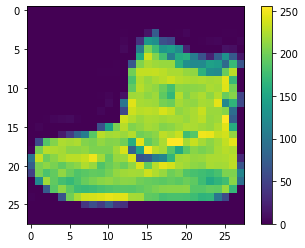

In [12]:
#预处理数据
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
#对数据进行归一化
train_images = train_images / 255.0

test_images = test_images / 255.0

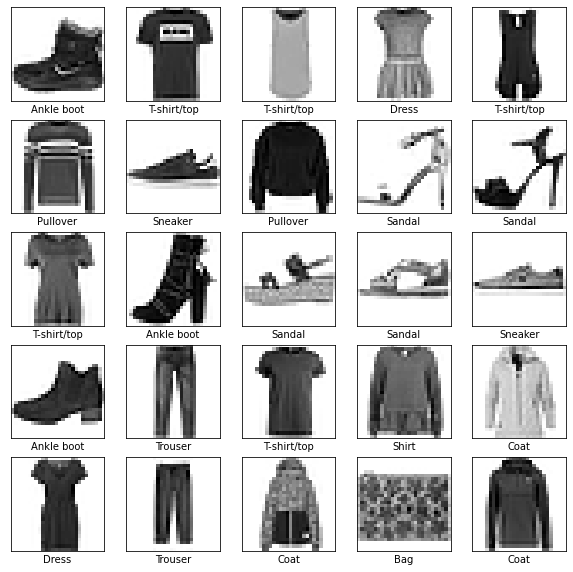

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [18]:
#构建model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
    
])

#编model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [19]:
import datetime
import time

#开始时间
start_time = time.perf_counter()
#训练模型
model.fit(train_images, train_labels, epochs=15)
#结束时间
end_time = time.perf_counter()
#计算时差
print("训练时间 = " + str(end_time - start_time) + " 秒" )


Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 4.7779 - accuracy: 0.6977
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6819 - accuracy: 0.7207
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1341 - accuracy: 0.7645
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7700 - accuracy: 0.8024
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7207 - accuracy: 0.8049
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6662 - accuracy: 0.8153
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6360 - accuracy: 0.8151
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6116 - accuracy: 0.8160
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6044 - accuracy: 0.8201
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.601

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.5885 - accuracy: 0.8163 - 592ms/epoch - 2ms/step

Test accuracy: 0.8162999749183655


In [7]:
#进行预测
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])


In [12]:
predictions = probability_model.predict(test_images)

In [13]:
predictions[0]

array([3.6363819e-09, 1.9240895e-14, 5.3985361e-11, 1.8804031e-11,
       1.5720857e-11, 1.0089298e-06, 1.1734159e-07, 9.2625531e-04,
       1.2321087e-09, 9.9907255e-01], dtype=float32)

In [15]:
#查看预测test_img[0]置信度最高的标签
np.argmax(predictions[0])

9

In [16]:
#查看test_img[0]的标签
test_labels[0]

9

### 验证预测结果，对多个预测结果进行可视化呈现，预测正确为绿色，错误为红色

*   列表项
*   列表项



In [26]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

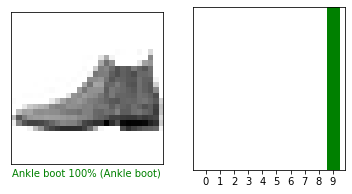

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

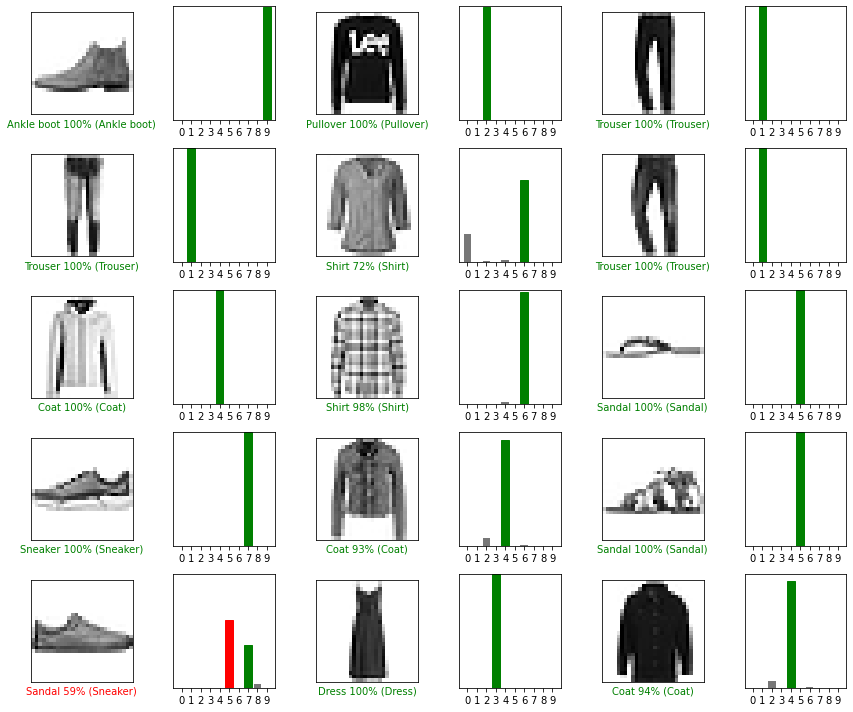

In [28]:

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

对单个图像进行预测

In [30]:

img = test_images[1]
img = (np.expand_dims(img,0))
predictions_single = probability_model.predict(img)

print(predictions_single)
np.argmax(predictions_single[0])

[[5.7576162e-06 1.2264117e-16 9.9704725e-01 5.3065211e-16 2.9293697e-03
  8.6179436e-14 1.7752305e-05 6.9079847e-14 2.4216018e-15 9.1493503e-16]]


2